In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv("OutliersRemoved.csv")

In [3]:
df

,age,education-num,sex,hours-per-week,salary,workclass,education,marital-status,occupation,relationship,race,country,fnlwgt
0,39,13,0,40,0,1279,5044,9726,3721,7726,25933,28833,77516.0
1,50,13,0,13,0,2499,5044,14065,3992,12463,25933,28833,83311.0
2,38,9,0,40,0,22286,9840,4214,1350,7726,25933,28833,215646.0
3,53,7,0,40,0,22286,1048,14065,1350,12463,2817,28833,234721.0
4,28,13,1,40,0,22286,5044,14065,4038,1406,2817,28833,338409.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29988,27,12,1,38,0,22286,1008,14065,912,1406,25933,28833,257302.0
29989,40,9,0,40,1,22286,9840,14065,1966,12463,25933,28833,154374.0
29990,58,9,1,40,0,22286,9840,827,3721,3212,25933,28833,151910.0
29991,22,9,0,20,0,22286,9840,9726,3721,4466,25933,28833,201490.0


Now we need to bring our data into normal distribution

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
def diagnostic_plots(df , variable):
    
    plt.figure(figsize =(15 , 6))
    plt.subplot(1,2,1)
    df[variable].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(df[variable] , dist='norm' , plot = plt)
    plt.xlabel(variable)
    plt.show()

    

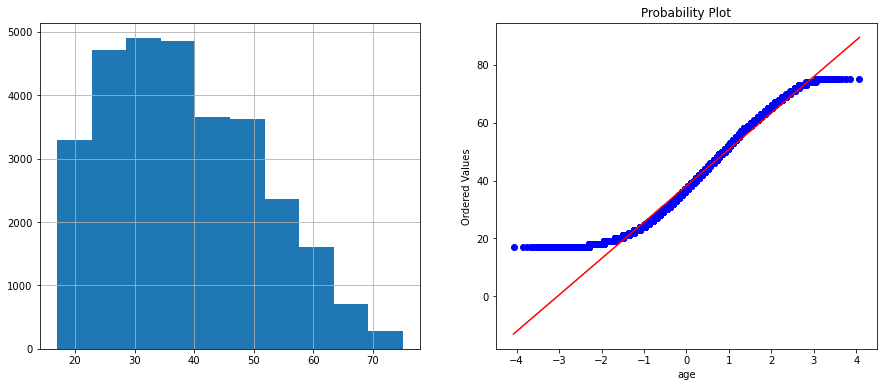

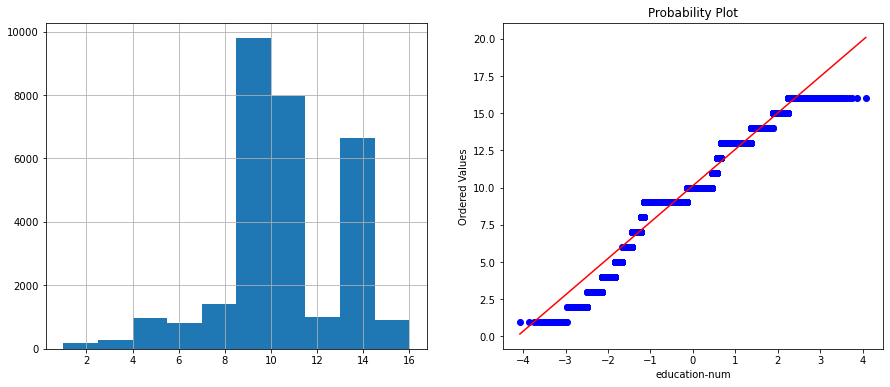

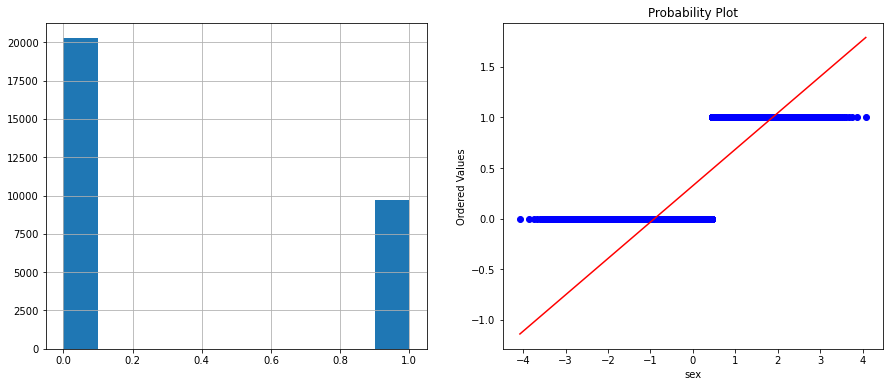

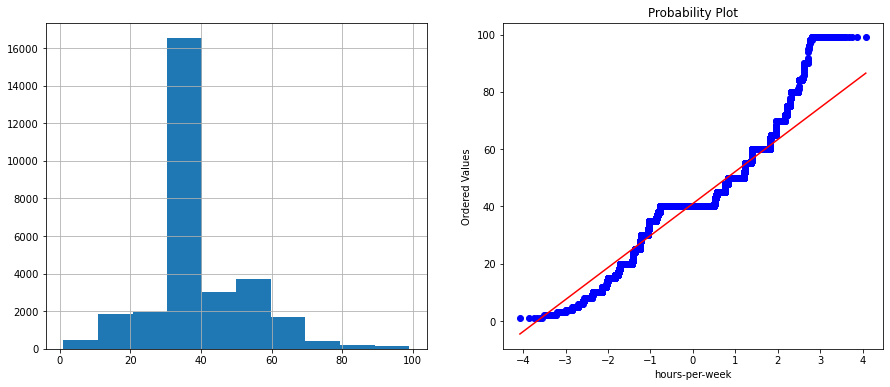

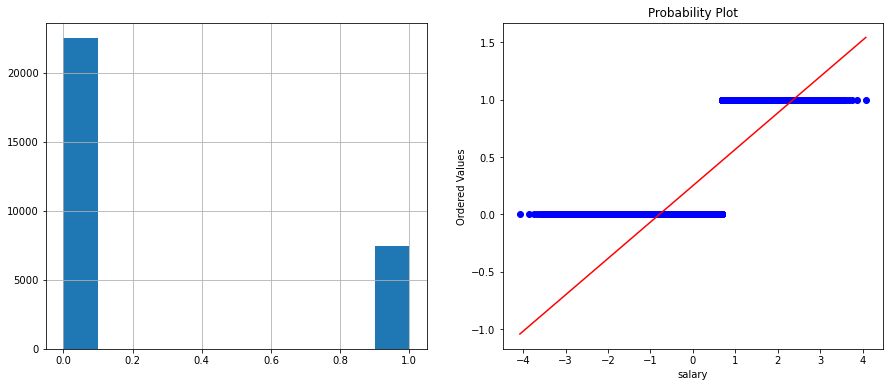

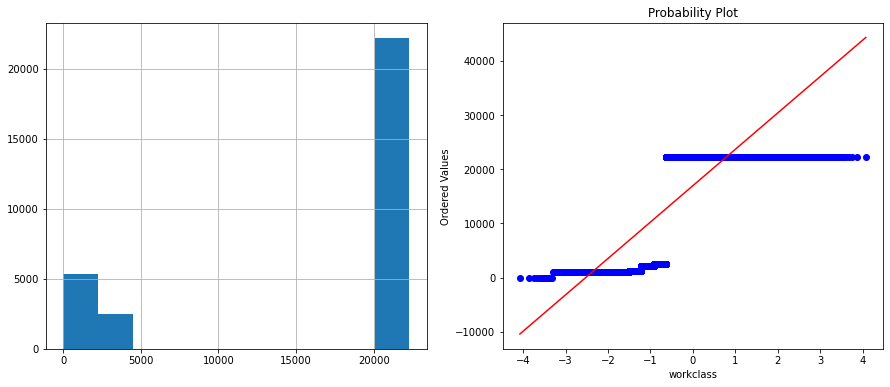

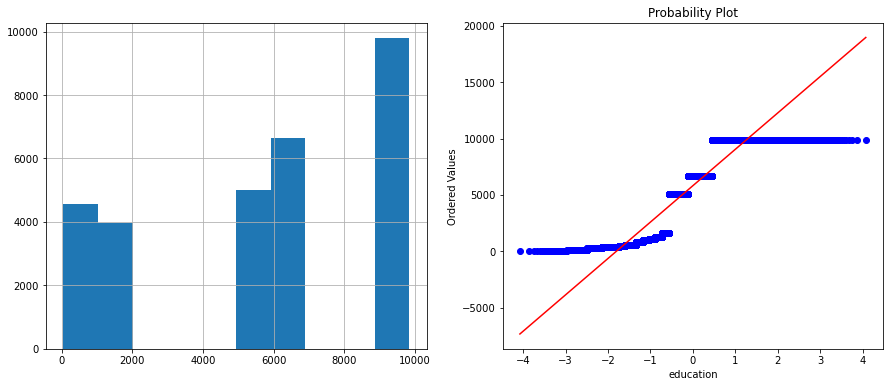

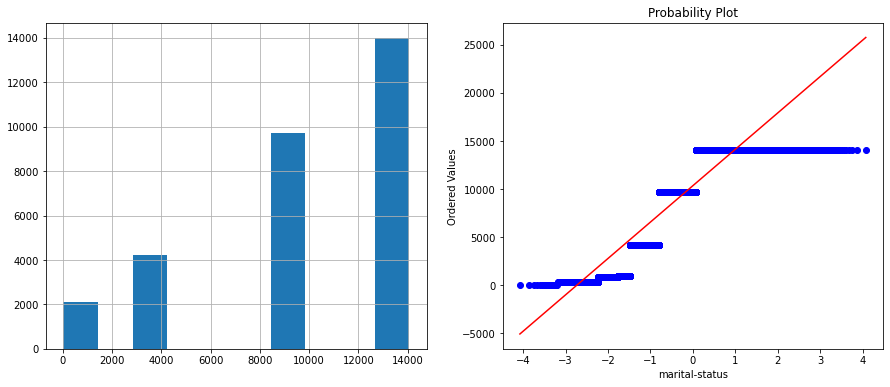

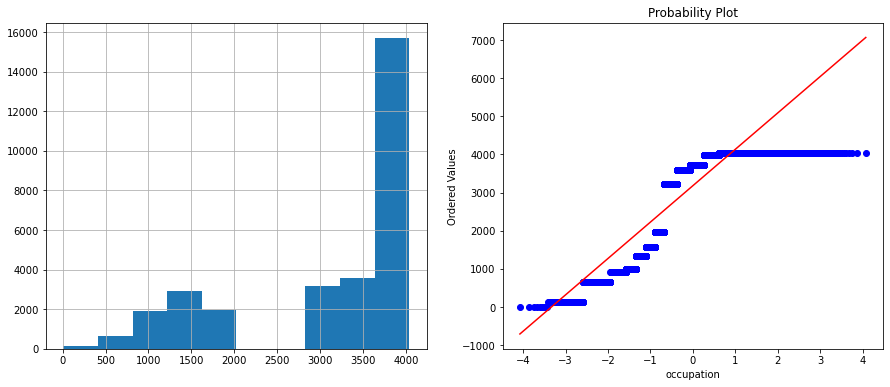

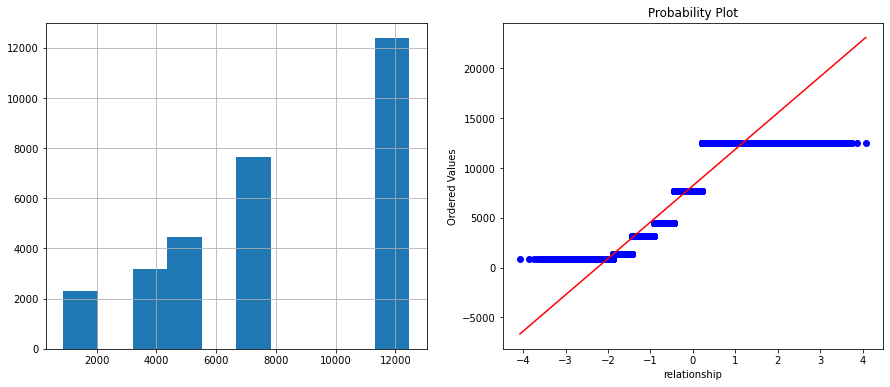

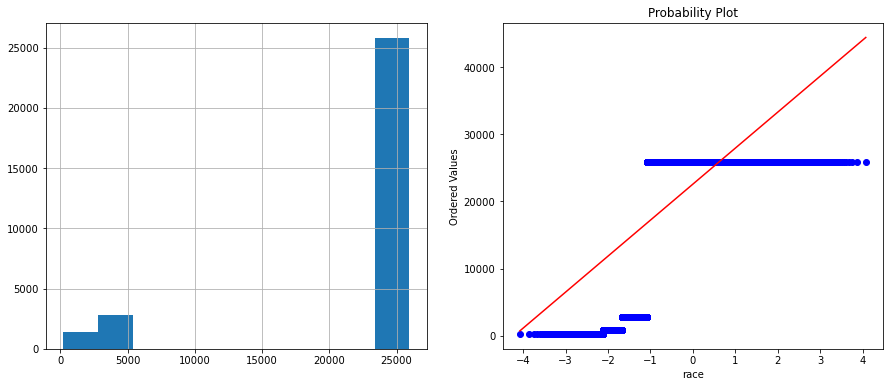

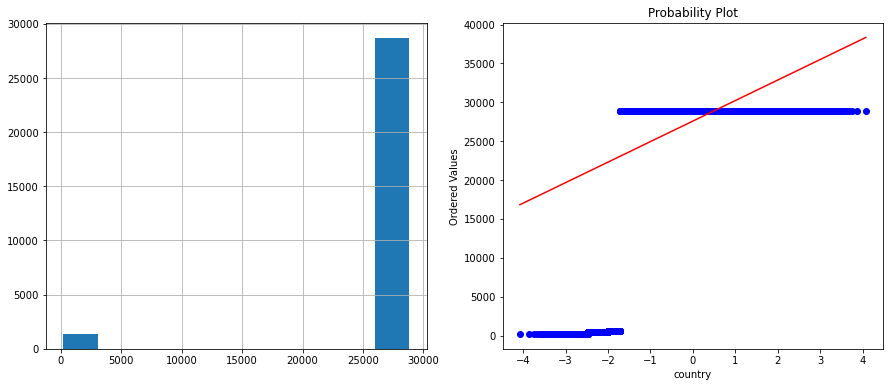

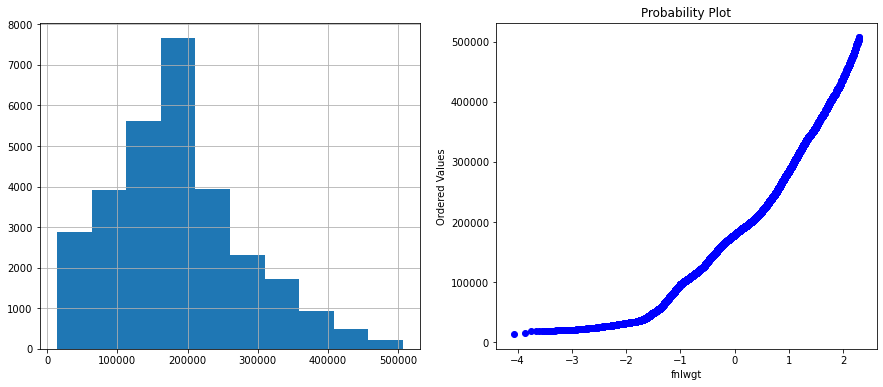

In [6]:
for feautre in df.columns:
    diagnostic_plots(df , feautre)
    

As we can see that some of the features are not normally distributed. 
Performing data normalization on fnlwgt , education_num ,martial_status , occupation , hours_per_week , releationship and race columns.

In [7]:
df_new = df.copy()

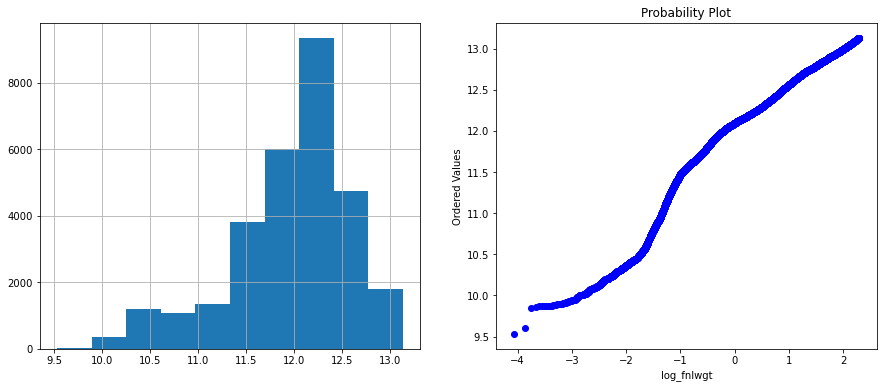

In [8]:
df_new['log_fnlwgt'] = np.log(df_new['fnlwgt']+1)
diagnostic_plots(df_new , 'log_fnlwgt')

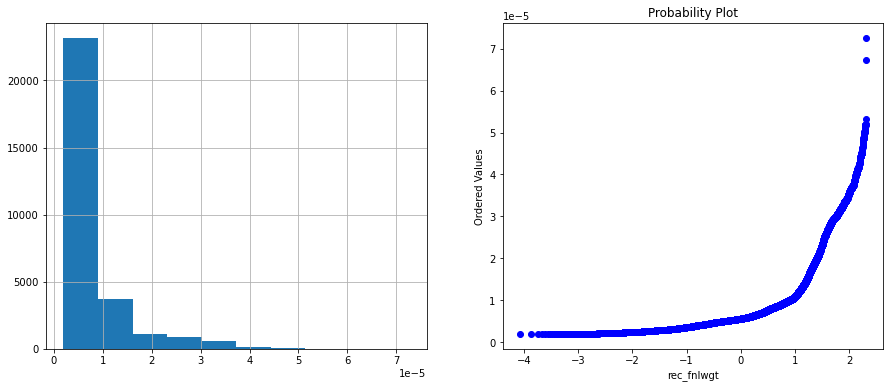

In [9]:
df_new['rec_fnlwgt'] = 1/(df_new['fnlwgt']+1)
diagnostic_plots(df_new , 'rec_fnlwgt')

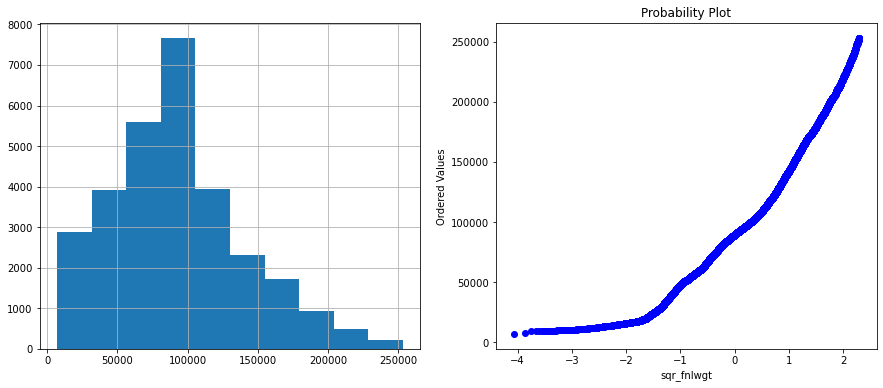

In [10]:
df_new['sqr_fnlwgt'] = df_new['fnlwgt']**1/2
diagnostic_plots(df_new , 'sqr_fnlwgt')

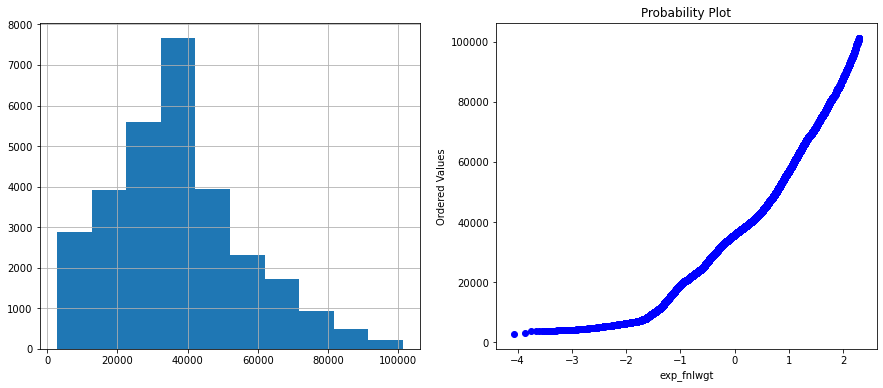

In [11]:
df_new['exp_fnlwgt'] = df_new['fnlwgt']**1/5
diagnostic_plots(df_new , 'exp_fnlwgt')

Optimal lambda:  8.472135811722177


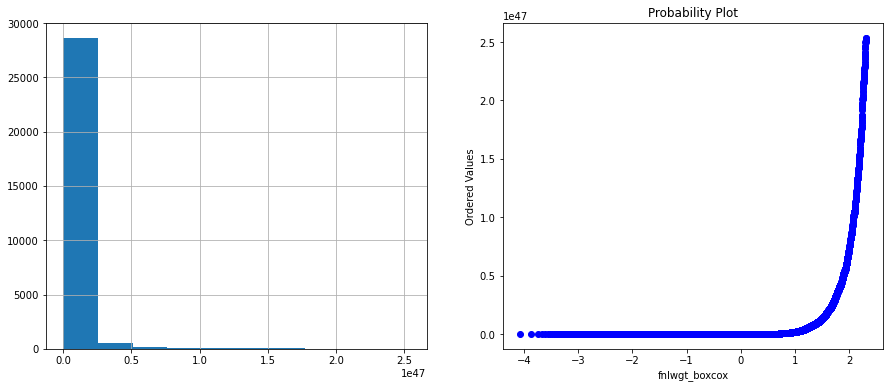

In [12]:
df_new['fnlwgt_boxcox'], param = stats.boxcox(df_new.fnlwgt+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(df_new, 'fnlwgt_boxcox')

Looking at the above transformation for the "fnlwgt" column it is clear that the original data is good enough to be used for further analysis , as no other transformation are more efficient.

Performing the above samme transformation on education_num column

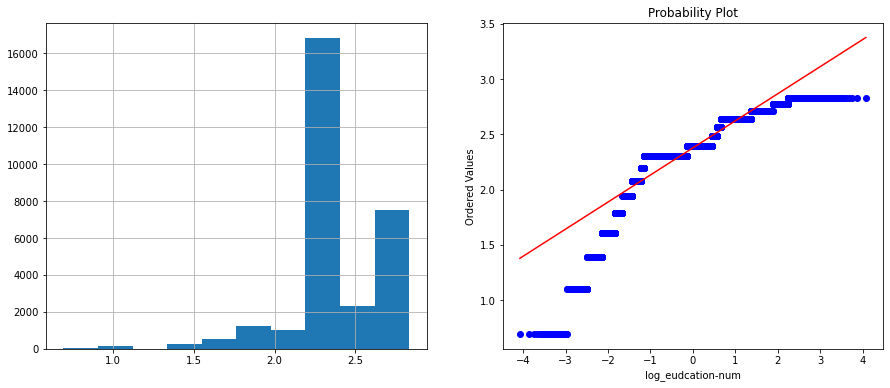

In [13]:
df_new['log_eudcation-num'] = np.log(df_new['education-num']+1)
diagnostic_plots(df_new , 'log_eudcation-num')

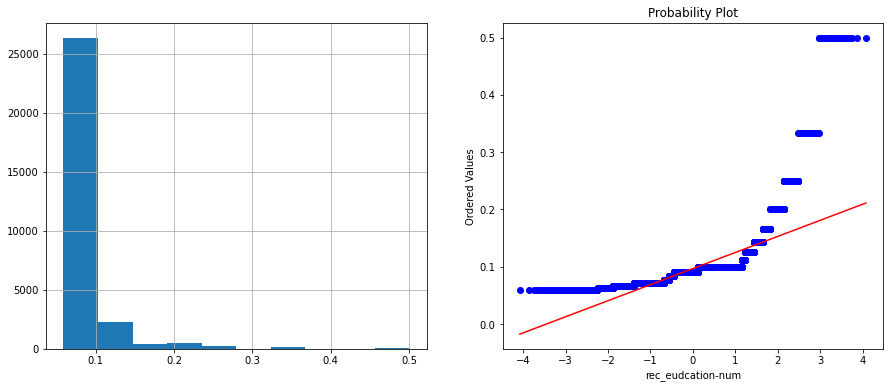

In [14]:
df_new['rec_eudcation-num'] = 1/(df_new['education-num']+1)
diagnostic_plots(df_new , 'rec_eudcation-num')

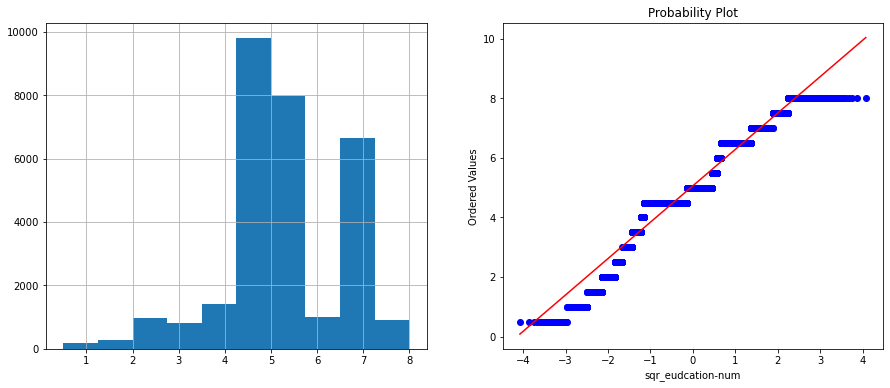

In [15]:
df_new['sqr_eudcation-num'] = df_new['education-num']**1/2
diagnostic_plots(df_new , 'sqr_eudcation-num')

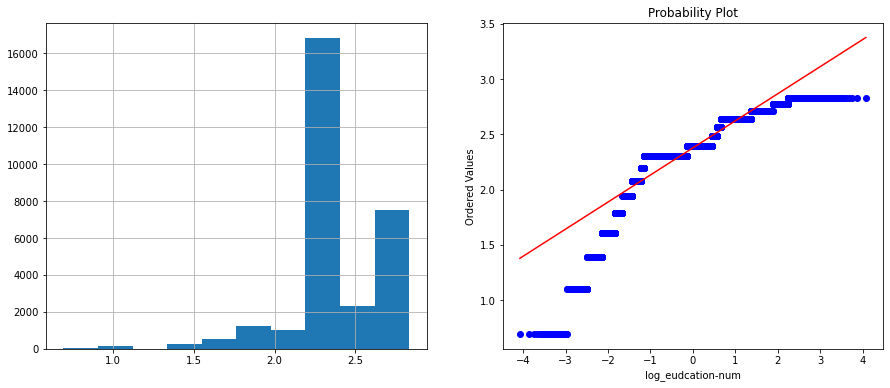

In [16]:
df_new['log_eudcation-num'] = np.log(df_new['education-num']+1)
diagnostic_plots(df_new , 'log_eudcation-num')

In [17]:
df.isna().sum()

age                 0
education-num       0
sex                 0
hours-per-week      0
salary              0
workclass           0
education           0
marital-status      0
occupation          0
relationship        0
race                0
country             0
fnlwgt            319
dtype: int64

In [26]:
df['fnlwgt'] = df['fnlwgt'].fillna(df['fnlwgt'].median())

In [28]:
df.isna().sum()

age               0
education-num     0
sex               0
hours-per-week    0
salary            0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
country           0
fnlwgt            0
dtype: int64

In [29]:
df.to_csv("OutliersRemoved.csv" , index = True)